# This is for analysis of the asynchronous and synchronous Gremlin runs

* Get the times for work vs. idle times by asynchronous vs. asynchronous with selection from evaluating individuals runs for Gremlin
* Get the total time start of first evaluation to the end of the last evaluation by run type
* Show the impact, if any, on performance

In [1]:
import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
rundata = pd.read_csv('gremlin_async_and_new_async.csv')

In [3]:
rundata

,run,hostname,pid,uuid,birth_id,scenario,cloudiness,wetness,precipitation,precipitation_deposits,...,fog_density,fog_distance,sun_azimuth_angle,sun_altitude_angle,start_eval_time,stop_eval_time,fitness,job_id,run_type,generation
0,3,d36n08,105620,eaa6d360-751a-4536-9ee7-6ecceffaf759,26,14,8,49,50,50,...,12,1.560000,123,10,1.622667e+09,1.622667e+09,18.441713,1051001,async,NaN
1,3,d36n01,24482,3403baac-6418-4c4a-a063-b478c5f98fd9,42,13,89,16,25,75,...,37,719.575940,306,-42,1.622667e+09,1.622667e+09,63.508626,1051001,async,NaN
2,3,d36n07,170330,b01e7cac-eb6c-4d37-9805-c44298aa5706,37,36,49,20,50,75,...,21,15.777216,77,17,1.622667e+09,1.622667e+09,99.302382,1051001,async,NaN
3,3,d36n01,24466,102e48ba-c110-4f6e-bdbf-3cd8c563c8c5,43,25,60,46,50,0,...,38,9.485760,318,72,1.622667e+09,1.622667e+09,47.844071,1051001,async,NaN
4,3,d36n02,45849,8bb41025-7261-43c7-8b56-37bf88afb26d,8,38,51,34,50,0,...,46,1843.674407,336,43,1.622667e+09,1.622667e+09,77.942178,1051001,async,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,3,g31n11,91443,d9837cf0-a4b2-4702-bb8a-a2f3cdfbf4c4,592,50,20,37,25,100,...,77,449.359963,226,-72,1.623613e+09,1.623613e+09,99.062990,1078364,eval_select,NaN
5996,3,g31n14,125087,3c5d2fcc-ed8c-4647-aa41-ea644e919501,593,50,20,36,50,100,...,75,449.359963,230,-72,1.623613e+09,1.623613e+09,99.173575,1078364,eval_select,NaN
5997,3,g31n18,95965,546d921c-52c5-4eba-8068-97f579cc1775,573,53,84,3,75,50,...,30,1843.674407,161,-62,1.623613e+09,1.623613e+09,94.893580,1078364,eval_select,NaN
5998,3,g31n13,149516,a8883138-62ab-4947-b02c-8a2bfb2bfd71,598,50,20,36,0,100,...,75,449.359963,230,-72,1.623613e+09,1.623613e+09,98.325259,1078364,eval_select,NaN


In [4]:
## Relationship of evaluation times over the course of a run
rundata['duration'] = rundata['stop_eval_time'] - rundata['start_eval_time']

<IPython.core.display.Javascript object>


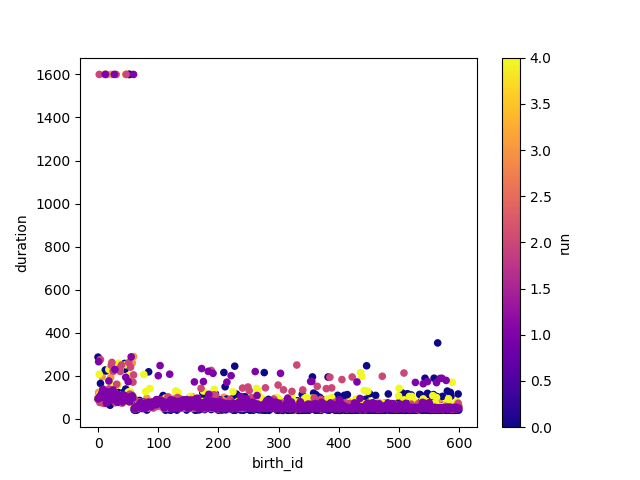

<IPython.core.display.Javascript object>


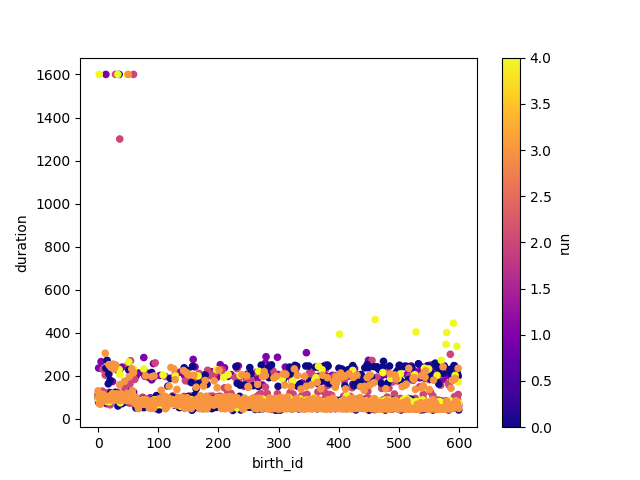

run_type
async          AxesSubplot(0.125,0.11;0.62x0.77)
eval_select    AxesSubplot(0.125,0.11;0.62x0.77)
dtype: object

In [26]:
rundata.groupby('run_type').plot.scatter('birth_id', 'duration', c='run', colormap='plasma')

<IPython.core.display.Javascript object>


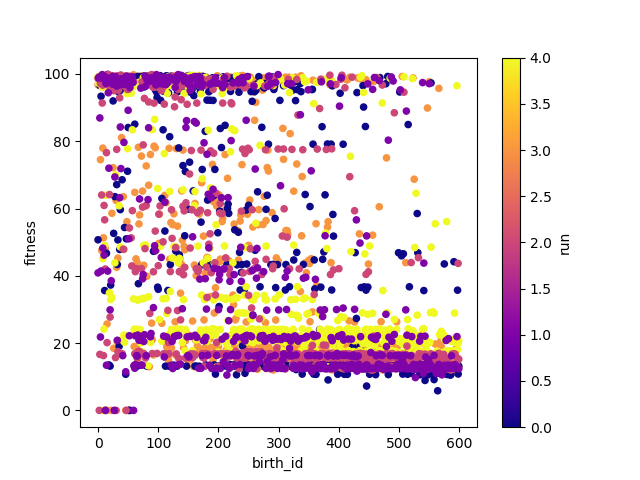

<IPython.core.display.Javascript object>


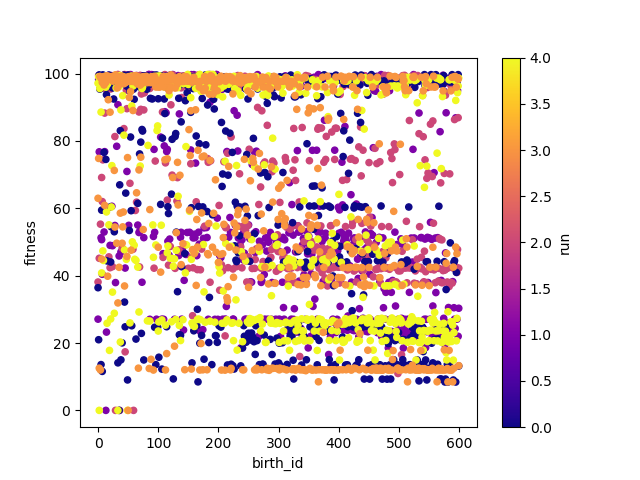

run_type
async          AxesSubplot(0.125,0.11;0.62x0.77)
eval_select    AxesSubplot(0.125,0.11;0.62x0.77)
dtype: object

In [27]:
rundata.groupby('run_type').plot.scatter('birth_id', 'fitness', c='run', colormap='plasma')

## Getting the total run evaluation times 

We would normally use the wall clock times, but the runs used the full batch job budget, so that approach is not an option.  (They generally finished before the wall clock time, but the way the various scripts are configured, bash `wait` statements keep the jobs for terminating. There should be a way to refactor those scripts such that the jobs will finish when the last EA puython script finishes, but that will have to await another time.)

So, we want `max(stop_eval_time) - min(start_eval_time)` by `run` and then by `run_type`.

In [6]:
by_run_and_type = rundata.groupby(['run_type','run'])

In [7]:
run_durations = by_run_and_type.agg({'start_eval_time' : min, 'stop_eval_time' : max})

In [8]:
run_durations

start_eval_time  stop_eval_time
run_type    run                                 
async       0       1.622667e+09    1.622669e+09
            1       1.622667e+09    1.622669e+09
            2       1.622667e+09    1.622669e+09
            3       1.622667e+09    1.622669e+09
            4       1.622667e+09    1.622669e+09
eval_select 0       1.623612e+09    1.623614e+09
            1       1.623612e+09    1.623614e+09
            2       1.623612e+09    1.623614e+09
            3       1.623612e+09    1.623614e+09
            4       1.623612e+09    1.623614e+09

In [9]:
run_durations['duration_secs'] = run_durations['stop_eval_time'] - run_durations['start_eval_time']

In [10]:
run_durations['duration_hrs'] = run_durations['duration_secs'] / 60 / 60

In [11]:
run_durations

start_eval_time  stop_eval_time  duration_secs  duration_hrs
run_type    run                                                              
async       0       1.622667e+09    1.622669e+09    1601.573439      0.444882
            1       1.622667e+09    1.622669e+09    1601.362803      0.444823
            2       1.622667e+09    1.622669e+09    1601.596051      0.444888
            3       1.622667e+09    1.622669e+09    1602.899437      0.445250
            4       1.622667e+09    1.622669e+09    1600.138789      0.444483
eval_select 0       1.623612e+09    1.623614e+09    1601.845984      0.444957
            1       1.623612e+09    1.623614e+09    1600.508257      0.444586
            2       1.623612e+09    1.623614e+09    1602.399687      0.445111
            3       1.623612e+09    1.623614e+09    1600.151510      0.444487
            4       1.623612e+09    1.623614e+09    1600.172481      0.444492

<IPython.core.display.Javascript object>


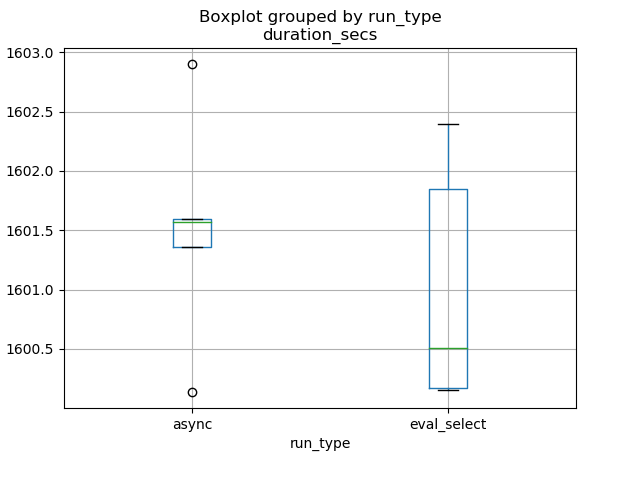

In [25]:
run_durations.boxplot(column=['duration_secs'], by='run_type')

## Getting work vs. idle times by run type

Each dask worker has an UUID, but we don't capture that, so we have to rely on concatenating the hostname and process ID (pid) to make a unique identifier that we'll later group by.

In [13]:
rundata['worker_id'] = rundata['hostname'] + rundata['pid'].astype(str)

In [14]:
# Turn the NaNs to zeros so we can at least count them
rundata['fitness'] = rundata['fitness'].fillna(0)

In [15]:
# group by the worker id so we can extract the start/stop times for that worker
by_worker = rundata.groupby('worker_id') 

In [16]:
# Dictionary keyed by worker id that will contain a list of start/stop times for each of them
worker_time_series = {} 

for name, group in by_worker:
    print(name)
    
    # We will serialize the start/stop times in 'times'; later, we'll add a sibling key to categorize each interval
    # and track their lengths.
    worker_time_series[name] = {'times' : [], 'run_type' : group['run_type'].iloc[0]}
    
    for start, stop in zip(group['start_eval_time'], group['stop_eval_time']):
        print(f'{start} {stop}')
        worker_time_series[name]['times'].append(start)
        worker_time_series[name]['times'].append(stop)

d13n1498578
1622667374.0087595 1622668974.0542214
d13n1498582
1622667373.5855114 1622668973.658787
d13n1498586
1622667373.60765 1622667602.5223696
1622667602.56624 1622667676.6529849
1622667676.6925411 1622667780.715092
1622667780.752449 1622667828.2910352
1622667828.3516502 1622667877.3236554
1622667877.3614385 1622667925.6013756
1622667927.3369114 1622667973.644244
1622667973.6842706 1622668021.0930545
1622668021.131532 1622668068.8906224
d13n1498590
1622667373.8118734 1622667483.7105105
1622667483.7442436 1622667684.2258306
1622667684.2748902 1622667768.2763445
1622667768.3178384 1622667823.436623
1622667823.4764605 1622667878.297618
1622667878.3348944 1622667931.417156
1622667931.4548686 1622667976.8308418
1622667976.871036 1622668024.8734407
1622668024.9130974 1622668071.763902
d13n1498594
1622667374.0545244 1622667472.4578755
1622667472.491603 1622667524.1049347
1622667524.1418793 1622667569.633916
1622667569.672808 1622667641.6272357
1622667641.663481 1622667708.6996439
16226677

1622667374.8030214 1622667486.9316015
1622667486.9652474 1622667571.0125651
1622667575.2138677 1622667652.4490945
1622667652.4851649 1622667721.8005195
1622667721.845588 1622667771.8634355
1622667771.901782 1622667823.514478
1622667823.5361915 1622667876.8951929
1622667876.9378464 1622667930.0746338
1622667930.1156595 1622667981.1081116
1622667981.2373555 1622668030.1038597
1622668030.1090047 1622668078.8826108
1622668078.9205654 1622668126.0253453
g27n04122677
1622667374.8043444 1622667474.8834975
1622667474.914926 1622667545.4264073
1622667545.4612546 1622667611.587016
1622667611.6288824 1622667660.290567
1622667660.327612 1622667710.086066
1622667710.1305845 1622667771.2321672
1622667771.2415519 1622667817.728514
1622667823.2871385 1622667871.2627153
1622667881.7372115 1622667931.3967006
1622667934.1990485 1622667985.7992144
1622667986.1374207 1622668033.4119833
1622668033.5362778 1622668080.4280179
1622668081.4248574 1622668131.5747187
g27n04122685
1622667374.805024 1622667468.2753

1623612474.9696968 1623612539.9979534
1623612540.031546 1623612609.2710054
1623612609.3135793 1623612671.5403662
1623612671.5754273 1623612737.8695893
1623612737.904313 1623612805.2788222
1623612805.311809 1623612878.0821626
1623612878.1244285 1623612945.3819356
1623612945.4155142 1623613031.1032903
1623613031.1452262 1623613083.5604634
g30n1235936
1623612239.8262818 1623612344.9708776
1623612345.003759 1623612411.6294842
1623612411.66291 1623612485.8114555
1623612485.8451414 1623612555.5509243
1623612555.5836177 1623612606.6346753
1623612606.6968348 1623612677.0764554
1623612677.112688 1623612744.301843
1623612744.3343475 1623612810.2103336
1623612810.2535315 1623612877.7478724
1623612877.781736 1623612960.5330222
1623612960.5671866 1623613036.6551158
1623613036.6892529 1623613438.1910155
g30n1235941
1623612239.8283136 1623612322.8591828
1623612322.8931482 1623612396.0327888
1623612396.0632195 1623612460.1458876
1623612460.1869009 1623612542.3553975
1623612542.389581 1623612618.380958

1622667374.6619322 1622667489.5494153
1622667489.5839508 1622667547.9738073
1622667548.029932 1622667629.8512676
1622667629.8936405 1622667713.282149
1622667713.3644075 1622667763.6721845
1622667763.7126038 1622667813.784341
1622667823.5536876 1622667882.2883985
1622667883.8934665 1622667933.5479045
1622667942.3379006 1622667993.4185913
1622667997.3776526 1622668051.7821555
1622668051.8229768 1622668103.3984606
g31n16101620
1622667374.6575804 1622667614.7071314
1622667614.7509904 1622667689.3787513
1622667689.422778 1622667740.3456974
1622667740.38796 1622667807.3925958
1622667808.0367804 1622667856.858581
1622667856.8969452 1622667908.8152554
1622667908.8526335 1622667958.6533575
1622667958.6587946 1622668010.4837205
1622668043.639305 1622668094.7500687
1622668102.3381882 1622668152.6024268
g31n16101624
1622667374.6588385 1622667623.5503352
1622667623.5950773 1622667702.2157354
1622667702.2592876 1622667760.9551847
1622667760.9950073 1622667814.7566595
1622667823.3386126 1622667874.59

1622667571.9804616 1622667643.8350787
1622667643.8714507 1622667711.7200522
1622667711.7645555 1622667765.1568944
1622667765.1974676 1622667833.7052207
1622667833.7580936 1622667910.0317087
1622667910.0692835 1622667962.5830734
1622667962.6195931 1622668017.7484353
1622668017.7890315 1622668091.3775976
h09n1264323
1622667376.6475663 1622667605.9752922
1622667606.0191836 1622667681.804504
1622667681.8429725 1622667737.7433634
1622667737.7898324 1622667793.6207757
1622667793.660645 1622667847.5742393
1622667847.6142638 1622667900.5510778
1622667900.5913627 1622668028.8790455
1622668028.917535 1622668078.1968286
h09n1264327
1622667376.6881096 1622667504.0498302
1622667504.0847821 1622667579.2430112
1622667579.3092787 1622667666.327812
1622667666.37614 1622667719.0177765
1622667719.0610385 1622667773.081492
1622667773.121425 1622667832.8184626
1622667832.8612592 1622667920.328384
1622667920.4015849 1622667973.1809564
1622667973.2211044 1622668025.0271242
1622668025.0659206 1622668077.33853

In [17]:
# Now lets convert that time series data to actual times series data format
for worker_id in worker_time_series.keys():
    # First we convert to a Series so that when we next convert to datetime it will return that as a series
    # instead of a DatetimeIndex.  We don't want an index, we want a Series so that we have access to 
    # rolling(), which does not exist for DatetimeIndex objects.
    worker_time_series[worker_id]['times'] = pd.Series(worker_time_series[worker_id]['times'])
    
    # Commented out the following because we just want to use subtract and that's not allowed on time series
    # worker_time_series[worker_id]['times'] = pd.to_datetime(worker_time_series[worker_id]['times'], unit='s')
    
    # Now compute the duration for each interval
    worker_time_series[worker_id]['durations'] = worker_time_series[worker_id]['times'].rolling(2).apply(lambda x: x[1] - x[0], raw=True)
    
    # Extract the durations for just when we were busy
    worker_time_series[worker_id]['work_durations'] = worker_time_series[worker_id]['durations'][1::2]
    worker_time_series[worker_id]['work_durations_total'] = worker_time_series[worker_id]['work_durations'].sum()
    
    # And then extract the idle time durations
    worker_time_series[worker_id]['idle_durations'] = worker_time_series[worker_id]['durations'][::2]
    worker_time_series[worker_id]['idle_durations_total'] = worker_time_series[worker_id]['idle_durations'].sum()
    

In [18]:
worker_time_series

{'d13n1498578': {'times': 0    1.622667e+09
  1    1.622669e+09
  dtype: float64,
  'run_type': 'async',
  'durations': 0            NaN
  1    1600.045462
  dtype: float64,
  'work_durations': 1    1600.045462
  dtype: float64,
  'work_durations_total': 1600.0454618930817,
  'idle_durations': 0   NaN
  dtype: float64,
  'idle_durations_total': 0.0},
 'd13n1498582': {'times': 0    1.622667e+09
  1    1.622669e+09
  dtype: float64,
  'run_type': 'async',
  'durations': 0            NaN
  1    1600.073276
  dtype: float64,
  'work_durations': 1    1600.073276
  dtype: float64,
  'work_durations_total': 1600.073275566101,
  'idle_durations': 0   NaN
  dtype: float64,
  'idle_durations_total': 0.0},
 'd13n1498586': {'times': 0     1.622667e+09
  1     1.622668e+09
  2     1.622668e+09
  3     1.622668e+09
  4     1.622668e+09
  5     1.622668e+09
  6     1.622668e+09
  7     1.622668e+09
  8     1.622668e+09
  9     1.622668e+09
  10    1.622668e+09
  11    1.622668e+09
  12    1.622668e+0

In [19]:
worker_time_df = pd.DataFrame.from_dict(worker_time_series, orient='index')

In [20]:
worker_time_df

,times,run_type,durations,work_durations,work_durations_total,idle_durations,idle_durations_total
d13n1498578,0 1.622667e+09 1 1.622669e+09 dtype: flo...,async,0 NaN 1 1600.045462 dtype: float64,1 1600.045462 dtype: float64,1600.045462,0 NaN dtype: float64,0.000000
d13n1498582,0 1.622667e+09 1 1.622669e+09 dtype: flo...,async,0 NaN 1 1600.073276 dtype: float64,1 1600.073276 dtype: float64,1600.073276,0 NaN dtype: float64,0.000000
d13n1498586,0 1.622667e+09 1 1.622668e+09 2 1....,async,0 NaN 1 228.914720 2 0.04...,1 228.914720 3 74.086745 5 104.02...,693.249750,0 NaN 2 0.043870 4 0.039556 6...,2.033222
d13n1498590,0 1.622667e+09 1 1.622667e+09 2 1....,async,0 NaN 1 109.898637 2 0.03...,1 109.898637 3 200.481587 5 84.00...,697.633065,0 NaN 2 0.033733 4 0.049060 6...,0.318964
d13n1498594,0 1.622667e+09 1 1.622667e+09 2 1....,async,0 NaN 1 98.403351 2 0.03372...,1 98.403351 3 51.613332 5 45.49203...,719.603473,0 NaN 2 0.033727 4 0.036945 6...,0.435608
...,...,...,...,...,...,...,...
h27n0722645,0 1.622667e+09 1 1.622667e+09 2 1....,async,0 NaN 1 95.432884 2 0.03...,1 95.432884 3 48.067631 5 77.60...,709.138552,0 NaN 2 0.031888 4 0.033911 6...,0.373268
h27n0722649,0 1.622667e+09 1 1.622668e+09 2 1....,async,0 NaN 1 134.278195 2 0.03...,1 134.278195 3 73.509934 5 48.22...,711.944177,0 NaN 2 0.036724 4 0.036153 6...,0.409059
h27n0722653,0 1.622667e+09 1 1.622667e+09 2 1....,async,0 NaN 1 113.774472 2 0.05...,1 113.774472 3 86.456760 5 56.13...,730.590712,0 NaN 2 0.050254 4 0.037076 6...,0.416134
h27n0722657,0 1.622667e+09 1 1.622667e+09 2 1....,async,0 NaN 1 99.988094 2 0.03442...,1 99.988094 3 70.969064 5 51.91314...,695.002129,0 NaN 2 0.034421 4 0.065876 6...,6.252839


In [21]:
# Just a sanity check to ensure that we have data for 300 workers for each run.b
worker_time_df.run_type.value_counts()

async          300
eval_select    295
Name: run_type, dtype: int64

Looks like we lost 5 workers from one run, but we shoulds till get a fair comparison.

In [22]:
worker_time_df.columns

Index(['times', 'run_type', 'durations', 'work_durations',
       'work_durations_total', 'idle_durations', 'idle_durations_total'],
      dtype='object')

<IPython.core.display.Javascript object>


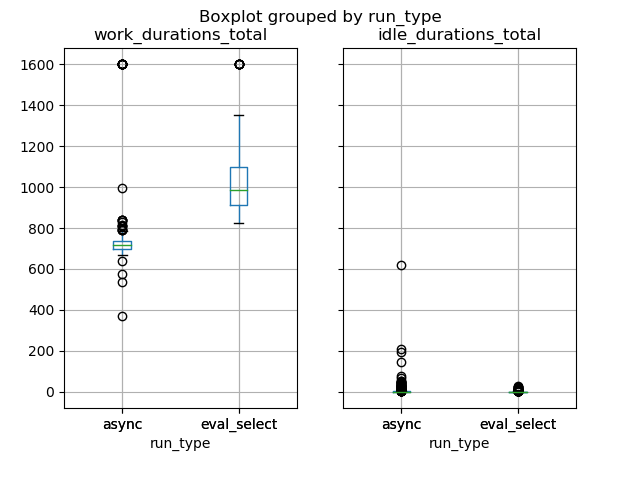

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3c828e358>,
      dtype=object)

In [24]:
worker_time_df.boxplot(column=['work_durations_total', 'idle_durations_total'], by='run_type')